In [ ]:
!pip install tensorflow

ERROR: Operation cancelled by user


In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [ ]:
(X_train, y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape #60000 images where every image is a 28X28 numpy array

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

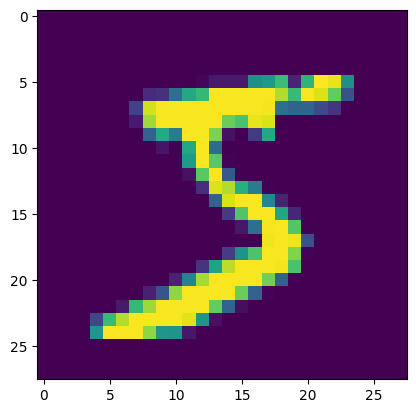

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [ ]:
#bringing all values to 0 and 1
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

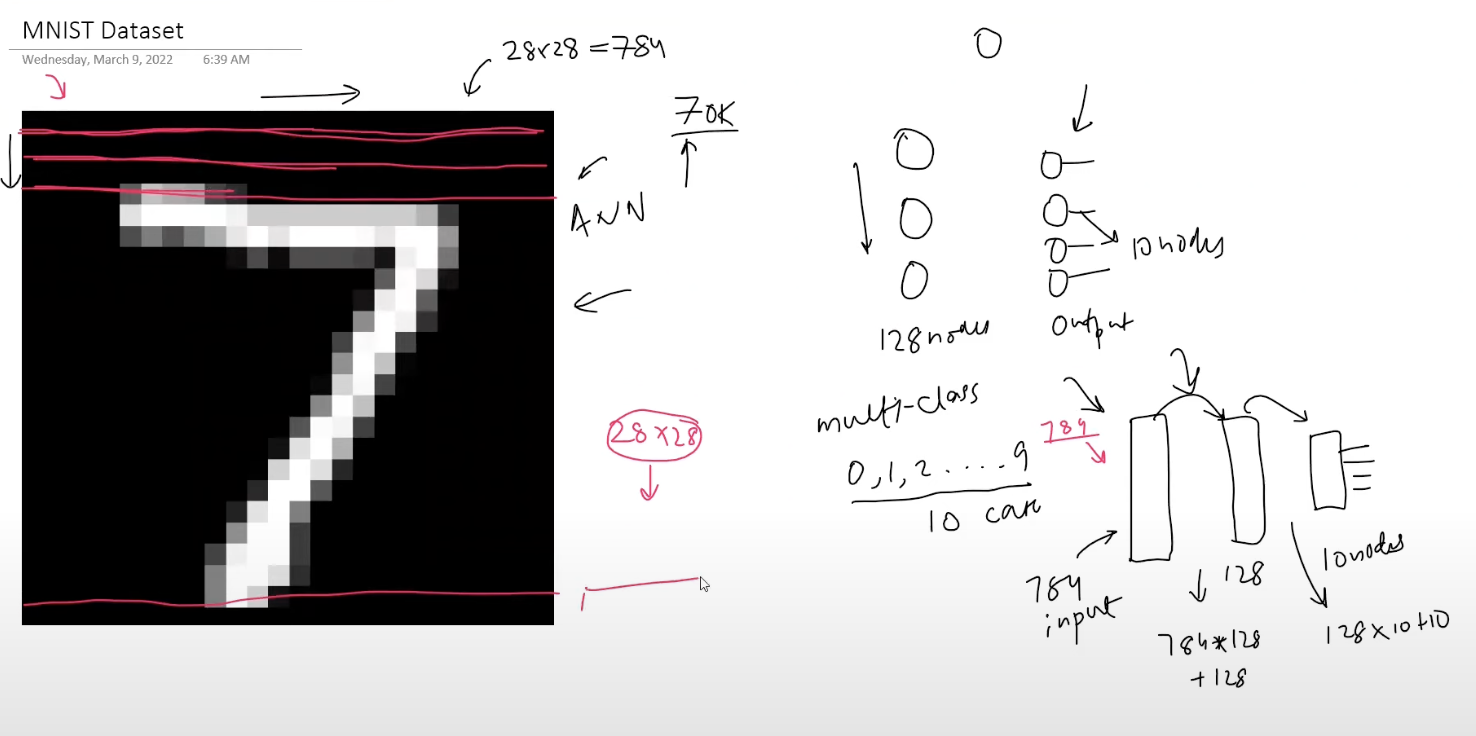

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))#this will convert the data in 1D, 784 inputs
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 32)                4128      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [ ]:
history= model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2914 - accuracy: 0.9151 - val_loss: 0.1594 - val_accuracy: 0.9513
Epoch 2/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1244 - accuracy: 0.9631 - val_loss: 0.1107 - val_accuracy: 0.9664
Epoch 3/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0865 - accuracy: 0.9734 - val_loss: 0.1003 - val_accuracy: 0.9693
Epoch 4/25
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0636 - accuracy: 0.9795 - val_loss: 0.0969 - val_accuracy: 0.9712
Epoch 5/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0503 - accuracy: 0.9835 - val_loss: 0.0922 - val_accuracy: 0.9737
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0398 - accuracy: 0.9878 - val_loss: 0.0909 - val_accuracy: 0.9746
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0313 - accuracy: 0.9897 - val_loss: 0.1007 - val_accuracy:

In [ ]:
y_prob= model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_pred= y_prob.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9754

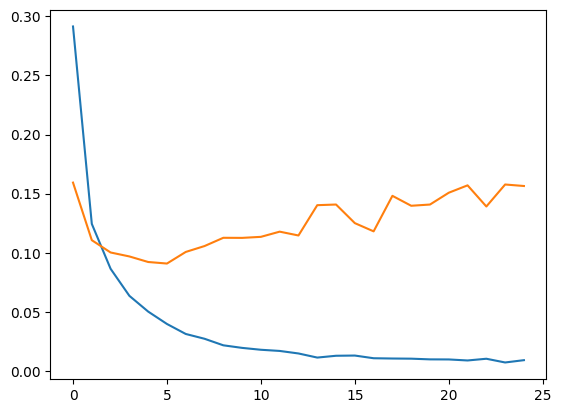

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

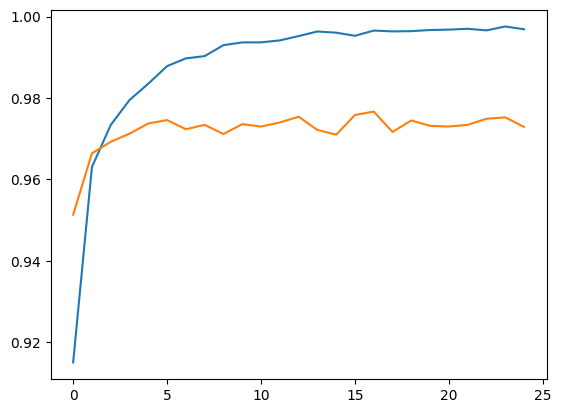

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

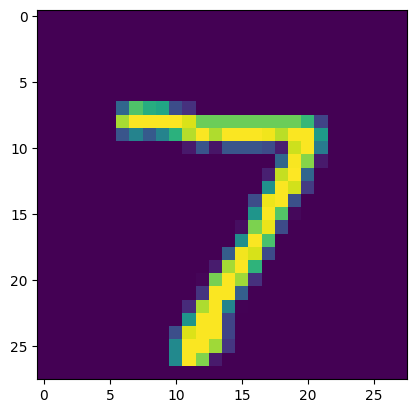

In [ ]:
plt.imshow(X_test[0])

In [ ]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 46ms/step


array([7])

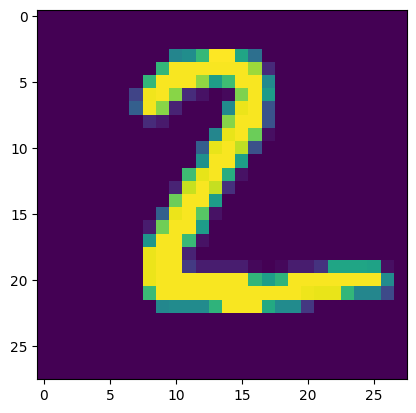

In [ ]:
plt.imshow(X_test[1])

In [ ]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 84ms/step


array([2])